# Fourier transforming 2 second epochs

In [6]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import autoreject
#from autoreject import *
import scipy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.stats.mstats import zscore
from fooof import FOOOF

#ROOT = '/home/dcellier/RDSS/CMI_data/MIPDB/EEGData/'
ROOT= '/data/backed_up/shared/CMI_data/MIPDB/preproc/'

In [7]:
#import pickle
#sub='A00056054'
#def read_object(filename):
#
 #               ''' short hand for reading object because I can never remember pickle syntax'''
#
 #               o = pickle.load(open(filename, "rb"))     
#
 #               return o
#twoSec_EO_epoch=read_object(ROOT+sub+'/EEG/preproc/'+sub+'_epoch_eyesOpen')
#twoSec_EC_epoch=read_object(ROOT+sub+'/EEG/preproc/'+sub+'_epoch_eyesClosed')

In [8]:
sub='A00053440'
sub2='A00059578'

In [31]:
EC2=mne.read_epochs(ROOT+sub2+'/'+sub2+'_eyes_closed-epo.fif')
EO2=mne.read_epochs(ROOT+sub2+'/'+sub2+'_eyes_open-epo.fif')

Reading /data/backed_up/shared/CMI_data/MIPDB/preproc/A00059578/A00059578_eyes_closed-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     250.00 ms
        0 CTF compensation matrices available
727 matching events found
Applying baseline correction (mode: mean)
727 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading /data/backed_up/shared/CMI_data/MIPDB/preproc/A00059578/A00059578_eyes_open-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     250.00 ms
        0 CTF compensation matrices available
300 matching events found
Applying baseline correction (mode: mean)
300 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [9]:
EC=mne.read_epochs(ROOT+sub+'/'+sub+'_eyes_closed-epo.fif')
EO=mne.read_epochs(ROOT+sub+'/'+sub+'_eyes_open-epo.fif')

Reading /data/backed_up/shared/CMI_data/MIPDB/preproc/A00053440/A00053440_eyes_closed-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     250.00 ms
        0 CTF compensation matrices available
641 matching events found
Applying baseline correction (mode: mean)
641 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading /data/backed_up/shared/CMI_data/MIPDB/preproc/A00053440/A00053440_eyes_open-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     250.00 ms
        0 CTF compensation matrices available
325 matching events found
Applying baseline correction (mode: mean)
325 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


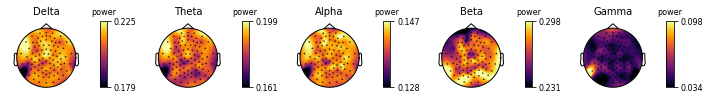

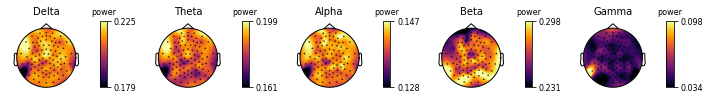

In [10]:
EC.plot_psd_topomap(ch_type='eeg', normalize=True,cmap='inferno',outlines='head') 
#interactive mode possible in ipython

In [75]:
EC.info['ch_names']
#len(EC.times)



['E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E15',
 'E16',
 'E18',
 'E19',
 'E20',
 'E22',
 'E23',
 'E24',
 'E26',
 'E27',
 'E28',
 'E29',
 'E30',
 'E31',
 'E33',
 'E34',
 'E35',
 'E36',
 'E37',
 'E39',
 'E40',
 'E41',
 'E42',
 'E45',
 'E46',
 'E47',
 'E50',
 'E51',
 'E52',
 'E53',
 'E54',
 'E55',
 'E58',
 'E59',
 'E60',
 'E61',
 'E62',
 'E65',
 'E66',
 'E67',
 'E70',
 'E71',
 'E72',
 'E75',
 'E76',
 'E77',
 'E78',
 'E79',
 'E80',
 'E83',
 'E84',
 'E85',
 'E86',
 'E87',
 'E90',
 'E91',
 'E92',
 'E93',
 'E96',
 'E97',
 'E98',
 'E101',
 'E102',
 'E103',
 'E104',
 'E105',
 'E106',
 'E108',
 'E109',
 'E110',
 'E111',
 'E112',
 'E115',
 'E116',
 'E117',
 'E118',
 'E122',
 'E123',
 'E124']

In [33]:
### WHAT IS n_fft doing?? ###

#should be using the scrubbed epochs but its ok for now
psds,freqs=mne.time_frequency.psd_welch(EC,fmin=1,fmax=50,tmax=.25,n_fft=126,n_overlap=(len(EC.times)*.125))
# default FFT is 256
# n_overlap at 12.5% like sangtae
# length of ea Welch segment defaults to 256
# *** this function is taking issue w/ picks=realData-- don't know why ****
# there is another function, mne.time_frequency.psd_array_welch-- what's the diff?
# psds = psd's, shape (n_epochs,n_channels,n_freqs)
    # should I average over n_epochs now?
        # and then for IAF it would be the avg psd's for occiptal electrodes & alpha freqs ?
        

Effective window size : 0.252 (s)


In [34]:
psds2,freqs2=mne.time_frequency.psd_welch(EC2,fmin=1,fmax=50,tmax=.25,n_fft=126,n_overlap=(len(EC2.times)*.125))

Effective window size : 0.252 (s)


In [48]:
psds.shape

(641, 90, 12)

In [53]:
k=np.concatenate(([psds,psds2]),axis=0)

In [54]:
k.shape

(1368, 90, 12)

In [51]:
t=np.mean(k,axis=0)
t.shape

(90, 12)

In [13]:
# electrode clustering: run on all sbujects, average over
# similarity matrix bween every electrode and every other, builds up hierarchically
# w matlab: given all [Power Spectrum X channel] matrix, pdist function yields something that you feed into dendrogram (find scipy equivalent)

# average in time domain (of epochs) across clusters, then run psd_welch on that. FOOOF takes a matrix of the psd's
# frontal-central cluster and parietal occipital cluster manually for now, run FOOOF and give: peak freq, amp, bandwidth for theta/beta and alpha in parietal/occ cluster
# give the slope and y-int for ea of the 2 clusters
# 13 neural data points per person: beta fareq, beta amp, beta bandwidth, theta freq, theta amp, thea bandwidth, alpha freq, alpha amp, alpha bandwidth, frontal slope, frontal yint, posterior slope, yint   
# demographic data points (age/sex)

In [14]:
#psds.shape

In [52]:
a={'d':(1,2,3,4),'x':(5,6,7,8)}
a['d'][0]

1

In [25]:
chFreqs=np.mean(psds,axis=0)
chFreqs.shape

(90, 12)

In [16]:
np.matrix(psds)
#chFreqs

In [101]:
#Y=pdist(zscore(np.corrcoef(chFreqs)))
Y=pdist(chFreqs)
Z= linkage(Y)#,optimal_ordering=True)
Z.shape

(89, 4)

In [102]:
#Z

In [103]:
#val=pdist(psd,'euclidean')
#val.shape
#val

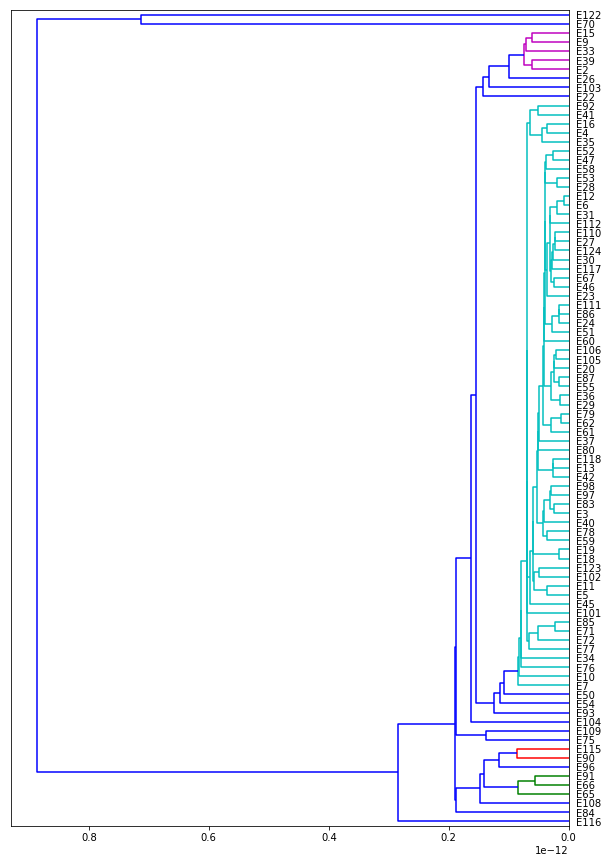

In [127]:
fig=plt.figure(figsize=(10,15))
dend=dendrogram(Z,128,leaf_font_size=10,orientation='left',color_threshold=0.1*max(Z[:,2]),labels=np.asarray(EC.info['ch_names']),truncate_mode='mlab')
# changed the threshold from matlab default of 0.7 to 0.5

In [128]:
dend.keys()
print(dend['ivl'])
from collections import defaultdict

['E116', 'E84', 'E108', 'E65', 'E66', 'E91', 'E96', 'E90', 'E115', 'E75', 'E109', 'E104', 'E93', 'E54', 'E50', 'E7', 'E10', 'E76', 'E34', 'E77', 'E72', 'E71', 'E85', 'E101', 'E45', 'E5', 'E11', 'E102', 'E123', 'E18', 'E19', 'E59', 'E78', 'E40', 'E3', 'E83', 'E97', 'E98', 'E42', 'E13', 'E118', 'E80', 'E37', 'E61', 'E62', 'E79', 'E29', 'E36', 'E55', 'E87', 'E20', 'E105', 'E106', 'E60', 'E51', 'E24', 'E86', 'E111', 'E23', 'E46', 'E67', 'E117', 'E30', 'E124', 'E27', 'E110', 'E112', 'E31', 'E6', 'E12', 'E28', 'E53', 'E58', 'E47', 'E52', 'E35', 'E4', 'E16', 'E41', 'E92', 'E22', 'E103', 'E26', 'E2', 'E39', 'E33', 'E9', 'E15', 'E70', 'E122']


In [129]:
len(dend['ivl'])

90

In [130]:
#cluster_idxs
#dend['color_list']

In [131]:
#print(cluster_idxs.items())
#print(cluster_idxs.keys())
#cluster_idxs['b']

In [132]:
def color_map(chs,coordinates,dend): 
    
    ## chs= list of electrodes to be 3d plotted, 
    ## coordinates= the coordinates of the electrodes to be plotted
    ## dend= a dendrogram of clustered electrodes 
    
    cluster_idxs = defaultdict(list) # this is creating a dict of color:channel inds in dend
    for c, pi in zip(dend['color_list'], dend['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    colors_dict=defaultdict(list)          
    coor_colors=np.zeros(len(chs))
    coor_colors=list(coor_colors)
    for color in cluster_idxs.keys():
        leaf_inds=cluster_idxs[color] # list of leaf inds for that color cluster
        for ind in leaf_inds:
            ch_name=dend['ivl'][ind] # grab the leaf label 
            coor_colors[chs.index(ch_name)]=color
            colors_dict[color].append(ch_name)
            #and match it to a label in dataChannels, 
            #then insert the color corresponding that ch_name
            # into coor_colors
    
    #%pylab inline
    from mpl_toolkits.mplot3d import Axes3D

    fig=plt.figure()
    fig2=plt.figure()
    ax=fig.add_subplot((111),projection='3d')
    ax2=fig2.add_subplot((111))
    coor2plot=coordinates
    for coor in range(len(coor2plot)):
        ax.scatter(xs=coor2plot[coor,0],ys=coor2plot[coor,1],zs=coor2plot[coor,2],c=coor_colors[coor],depthshade=True)
        ax2.scatter(x=coor2plot[coor,0],y=coor2plot[coor,1],c=coor_colors[coor])
        ax.text(x=coor2plot[coor,0],y=coor2plot[coor,1],z=coor2plot[coor,2],s=chs[coor])
        ax2.text(x=coor2plot[coor,0],y=coor2plot[coor,1],s=chs[coor])
    return plt.show(),colors_dict

In [133]:
#ROOT2 = '/home/dcellier/RDSS/CMI_data/MIPDB/EEGData/'
#raw_file=ROOT2+"A00056054/EEG/raw/raw_format/A00056054001.raw" #"A00051955/EEG/raw/raw_format/A00051955001.raw"#
#raw=mne.io.read_raw_egi(raw_file,montage=mne.channels.read_montage(kind='GSN-HydroCel-129'),preload=True, verbose=True)
#raw2=mne.io.read_raw_egi(raw_file,montage=mne.channels.read_montage(kind='GSN-HydroCel-128'),preload=True, verbose=True)

#chs_indices=mne.pick_types(raw.info,eeg=True)
#chs_list=raw.info['ch_names'][:129]
#len(chs_list)

chs_list=['E1','E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
          'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20',
          'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29',
          'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 
          'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46',
          'E47','E48', 'E49', 'E50', 'E51', 'E52',
          'E53', 'E54', 'E55', 'E56', 'E57',
          'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64',
          'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71',
          'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79',
          'E80', 'E81', 'E82', 'E83', 'E84',
          'E85', 'E86','E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93',
          'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101',
           'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108',
           'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115',
          'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 
          'E122', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128','E129']

dataChannels = ['E2','E3','E4','E5','E6','E7','E9','E10','E11','E12',
    'E13','E15','E16','E18','E19','E20','E22','E23','E24','E26',
    'E27','E28','E29','E30','E31','E33','E34','E35','E36','E37',
    'E39','E40','E41','E42','E45','E46','E47','E50','E51','E52','E53','E54','E55','E58','E59','E60','E61',
    'E62','E65','E66','E67','E70','E71','E72','E75','E76','E77','E78','E79','E80','E83','E84',
    'E85','E86','E87','E90','E91','E92','E93','E96','E97','E98','E101','E102','E103','E104',
    'E105','E106','E108','E109','E110','E111','E112','E115','E116','E117','E118','E122','E123','E124']
#names=twoSec_EO_epoch.info['ch_names']


#plot
#twoSec_EO_epoch.info['ch_names'].index('E4')
#dataInds

layout=mne.channels.read_montage(kind='GSN-HydroCel-129')
coordinates=layout.pos
coordinates=coordinates[3:] #slicing to exclude FidNz, FidT9, FidT10
len(coordinates)

#new list of coordinates where the indices of the coords match the dataCh inds
coor2plot=np.zeros(len(dataChannels))
coor2plot=list(coor2plot)
for i in chs_list: # iter thru elems in all channels list
    if i in dataChannels: # if the elem is also in dataChannels
        coor2plot[dataChannels.index(i)]=list(coordinates)[chs_list.index(i)]
        # then fill coor2plot with the coordinates of the elem, but make sure it's
        # inserted at an index that matches the index of the corresponding
        # dataChannels label

#coor2plot=[list(coordinates[chs_list.index(i)]) for i in chs_list if i in dataChannels] 
# getting the coordinates of the data channels
coor2plot=np.asarray(coor2plot)
coor2plot[:,2].shape

(90,)

In [134]:
#3333333coor2plot

In [135]:
#coor2plot

In [136]:
#len(chs_list)

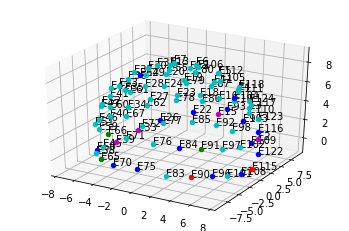

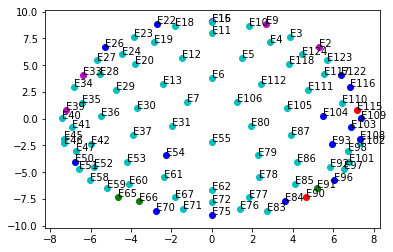

In [137]:
plot,colors=color_map(dataChannels,coor2plot,dend)

In [138]:
len(colors['y'])

0

In [139]:
notRed=[i for i in dataChannels if i not in colors['c']]
#twoSec_EC_epoch.load_data()
#twoSec_EO_epoch.load_data()
EC.load_data()
EO.load_data()
ec=EC.copy()
eo=EO.copy()
epEC_mf=ec.drop_channels(notRed)
epEO_mf=eo.drop_channels(notRed)

#notTeal=[e for e in dataChannels if e not in colors['c']]
#ec2=twoSec_EC_epoch.copy()
#eo2=twoSec_EO_epoch.copy()
#epEC_po=ec2.drop_channels(notTeal)
#epEO_po=eo2.drop_channels(notTeal)


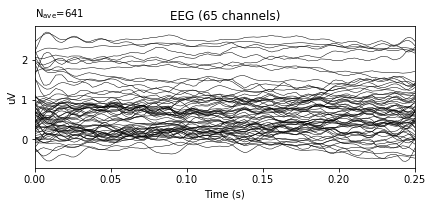

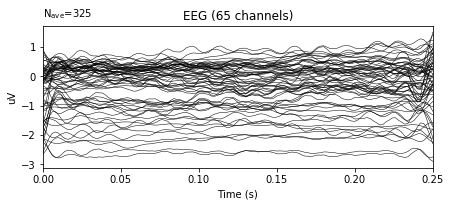

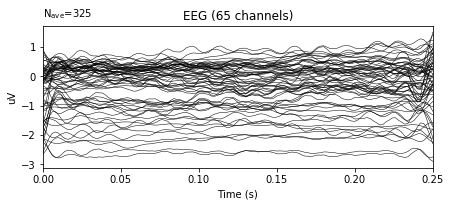

In [140]:
epEC_mf.average().plot()
epEO_mf.average().plot()

In [144]:
psdsEC_mf,freqsEC_mf=mne.time_frequency.psd_welch(epEC_mf,fmin=1,fmax=50,tmax=.25,n_fft=126,n_overlap=(len(EC.times)*.125))
psdsEO_mf,freqsEO_mf=mne.time_frequency.psd_welch(epEO_mf,fmin=1,fmax=50,tmax=.25,n_fft=126,n_overlap=(len(EO.times)*.125))

Effective window size : 0.252 (s)
Effective window size : 0.252 (s)


In [145]:
psdsEO_mf.shape

(325, 65, 12)

In [ ]:
#new_psds=[]
#for ch in colors['r']:
 #   ind=dataChannels.index(ch)
#    new_psds.append(psdsEO[ind,:])

In [ ]:
#psdsEO=np.asarray(new_psds)
#psdsEO.shape

In [146]:
avg_psds_EC_mf=np.mean(psdsEC_mf,axis=0)

avg_psds_EO_mf=np.mean(psdsEO_mf,axis=0)

In [147]:
print(avg_psds_EC_mf.shape)

(65, 12)


In [148]:
avg_psds_EC_mf=np.mean(avg_psds_EC_mf,axis=0)
avg_psds_EO_mf=np.mean(avg_psds_EO_mf,axis=0)

In [149]:
avg_psds_EC_mf.shape

(12,)

In [150]:
freqsEO_mf.shape

(12,)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 3.97 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 48 Hz                        
                                 Frequency Resolution is 3.97 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):    

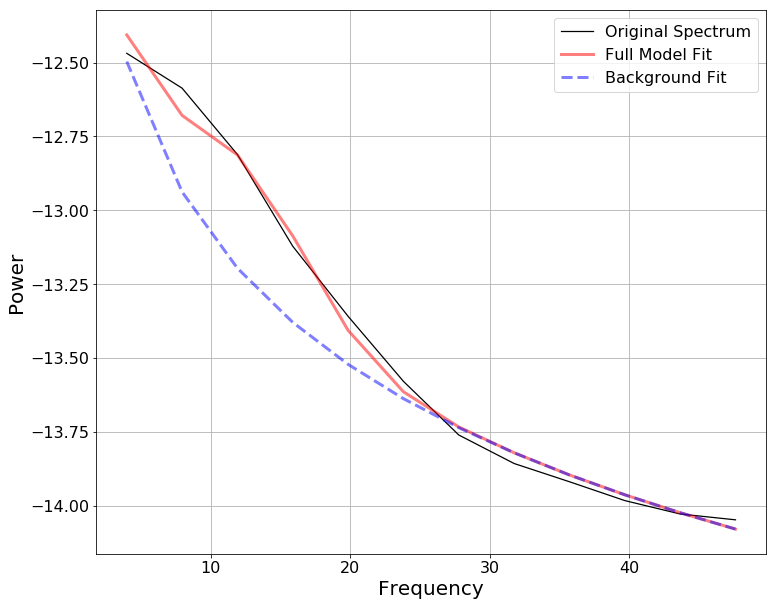

In [152]:
fmEC_mf= FOOOF()


freq_range=[1,50]

fmEC_mf.report(freqsEC_mf,avg_psds_EC_mf,freq_range)

In [188]:
FOOOF.report?
#FOOOF.get_results?

In [187]:
ress= fmEC_mf.get_results()
for i in ress.peak_params:
    print(i)
    for t in i:
        print(t)

[12.26906812  0.38390394  9.74576714]
12.269068121663045
0.3839039368092738
9.745767141795078



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 3.97 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 48 Hz                        
                                 Frequency Resolution is 3.97 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):    

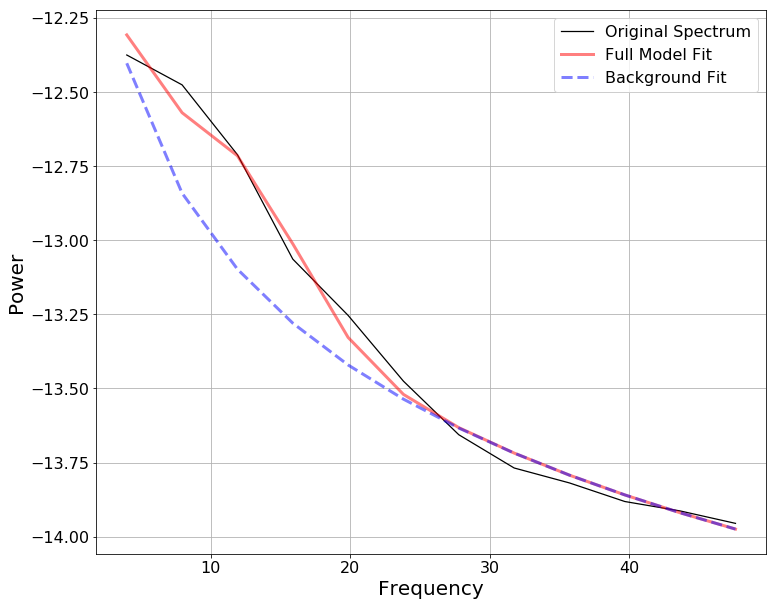

In [155]:
fmEO_mf= FOOOF()

freq_range=[1,50]

fmEO_mf.report(freqsEO_mf,avg_psds_EO_mf,freq_range)

In [44]:
theta_band=[4,8]
alpha_band=[8,12]
beta_band=[15,30]

In [45]:
from fooof import FOOOF, FOOOFGroup
from fooof.synth import gen_group_power_spectra,param_sampler
from fooof.analysis import get_band_peak, get_band_peak_group

get_band_peak?


In [46]:
alphas=get_band_peak(fmEO_mf.peak_params_,alpha_band,ret_one=True)
print('Alpha CF: ',alphas[0])
print('Amp: ', alphas[1])
print('Bandwidth: ', alphas[2])

Alpha CF:  nan
Amp:  nan
Bandwidth:  nan


In [47]:
betas=get_band_peak(fmEO_mf.peak_params_,beta_band,ret_one=True)
print('Beta CF: ',betas[0])
print('Amp: ', betas[1])
print('Bandwidth: ', betas[2])

Beta CF:  nan
Amp:  nan
Bandwidth:  nan


In [48]:
betas

array([nan, nan, nan])

In [49]:
thetas=get_band_peak(fmEO_mf.peak_params_,theta_band,ret_one=True)
print('Theta CF: ',thetas[0])
print('Amp: ', thetas[1])
print('Bandwidth: ', thetas[2])

Theta CF:  4.789130076437389
Amp:  0.18068329075202882
Bandwidth:  11.535280416077077


In [50]:
psdsEC_po,freqsEC_po=mne.time_frequency.psd_welch(epEC_po.average(),fmin=1,fmax=50,tmax=2,n_overlap=(len(twoSec_EC_epoch.times)*.125))
psdsEO_po,freqsEO_po=mne.time_frequency.psd_welch(epEO_po.average(),fmin=1,fmax=50,tmax=2,n_overlap=(len(twoSec_EO_epoch.times)*.125))
avg_psds_EC_po=np.mean(psdsEC_po,axis=0)
print(avg_psds_EC_po.shape)
avg_psds_EO_po=np.mean(psdsEO_po,axis=0)

Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
(25,)



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.95 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 49 Hz                        
                                 Frequency Resolution is 1.95 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):    

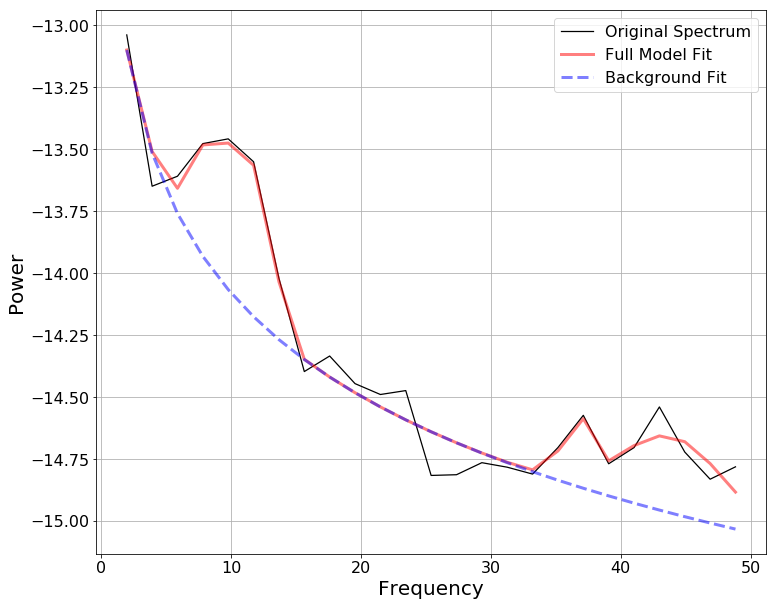

In [51]:
fmEC_po= FOOOF()
freq_range=[1,50]
fmEC_po.report(freqsEC_po,avg_psds_EC_po,freq_range)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.95 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 49 Hz                        
                                 Frequency Resolution is 1.95 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):    

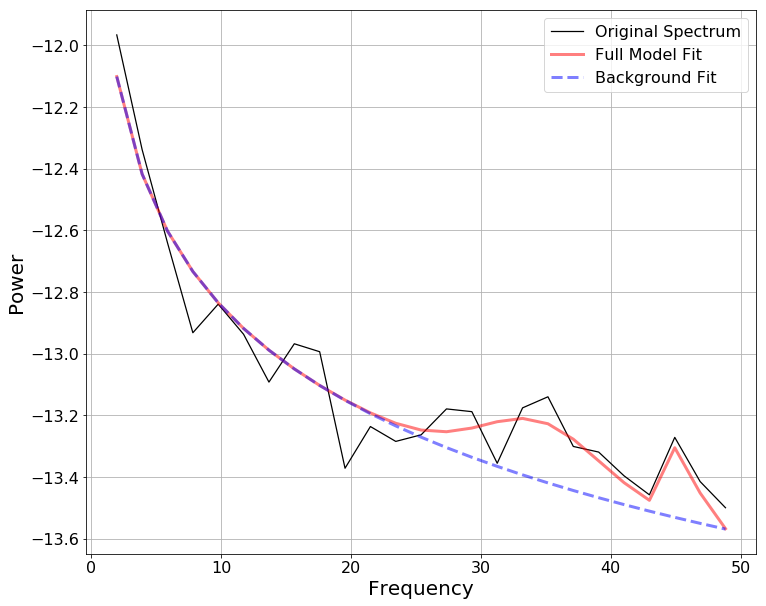

In [52]:
fmEO_po= FOOOF()
fmEO_po.report(freqsEO_po,avg_psds_EO_po,freq_range)

In [53]:
alphas=get_band_peak(fmEO_po.peak_params_,alpha_band,ret_one=True)
print('Alpha CF: ',alphas[0])
print('Amp: ', alphas[1])
print('Bandwidth: ', alphas[2])

Alpha CF:  nan
Amp:  nan
Bandwidth:  nan


In [54]:
betas=get_band_peak(fmEO_po.peak_params_,beta_band,ret_one=True)
print('Beta CF: ',betas[0])
print('Amp: ', betas[1])
print('Bandwidth: ', betas[2])

Beta CF:  nan
Amp:  nan
Bandwidth:  nan


In [55]:
thetas=get_band_peak(fmEO_po.peak_params_,theta_band,ret_one=True)
print('Theta CF: ',thetas[0])
print('Amp: ', thetas[1])
print('Bandwidth: ', thetas[2])

Theta CF:  nan
Amp:  nan
Bandwidth:  nan
